In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data=pd.read_csv("CarPrice_Assignment.csv")
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
data.drop(["car_ID"],axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [31]:
N_C=data.select_dtypes(include=["number"])
C_C=data.select_dtypes(include=["object"])
C_C

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in C_C:
    data[column]=le.fit_transform(data[column])

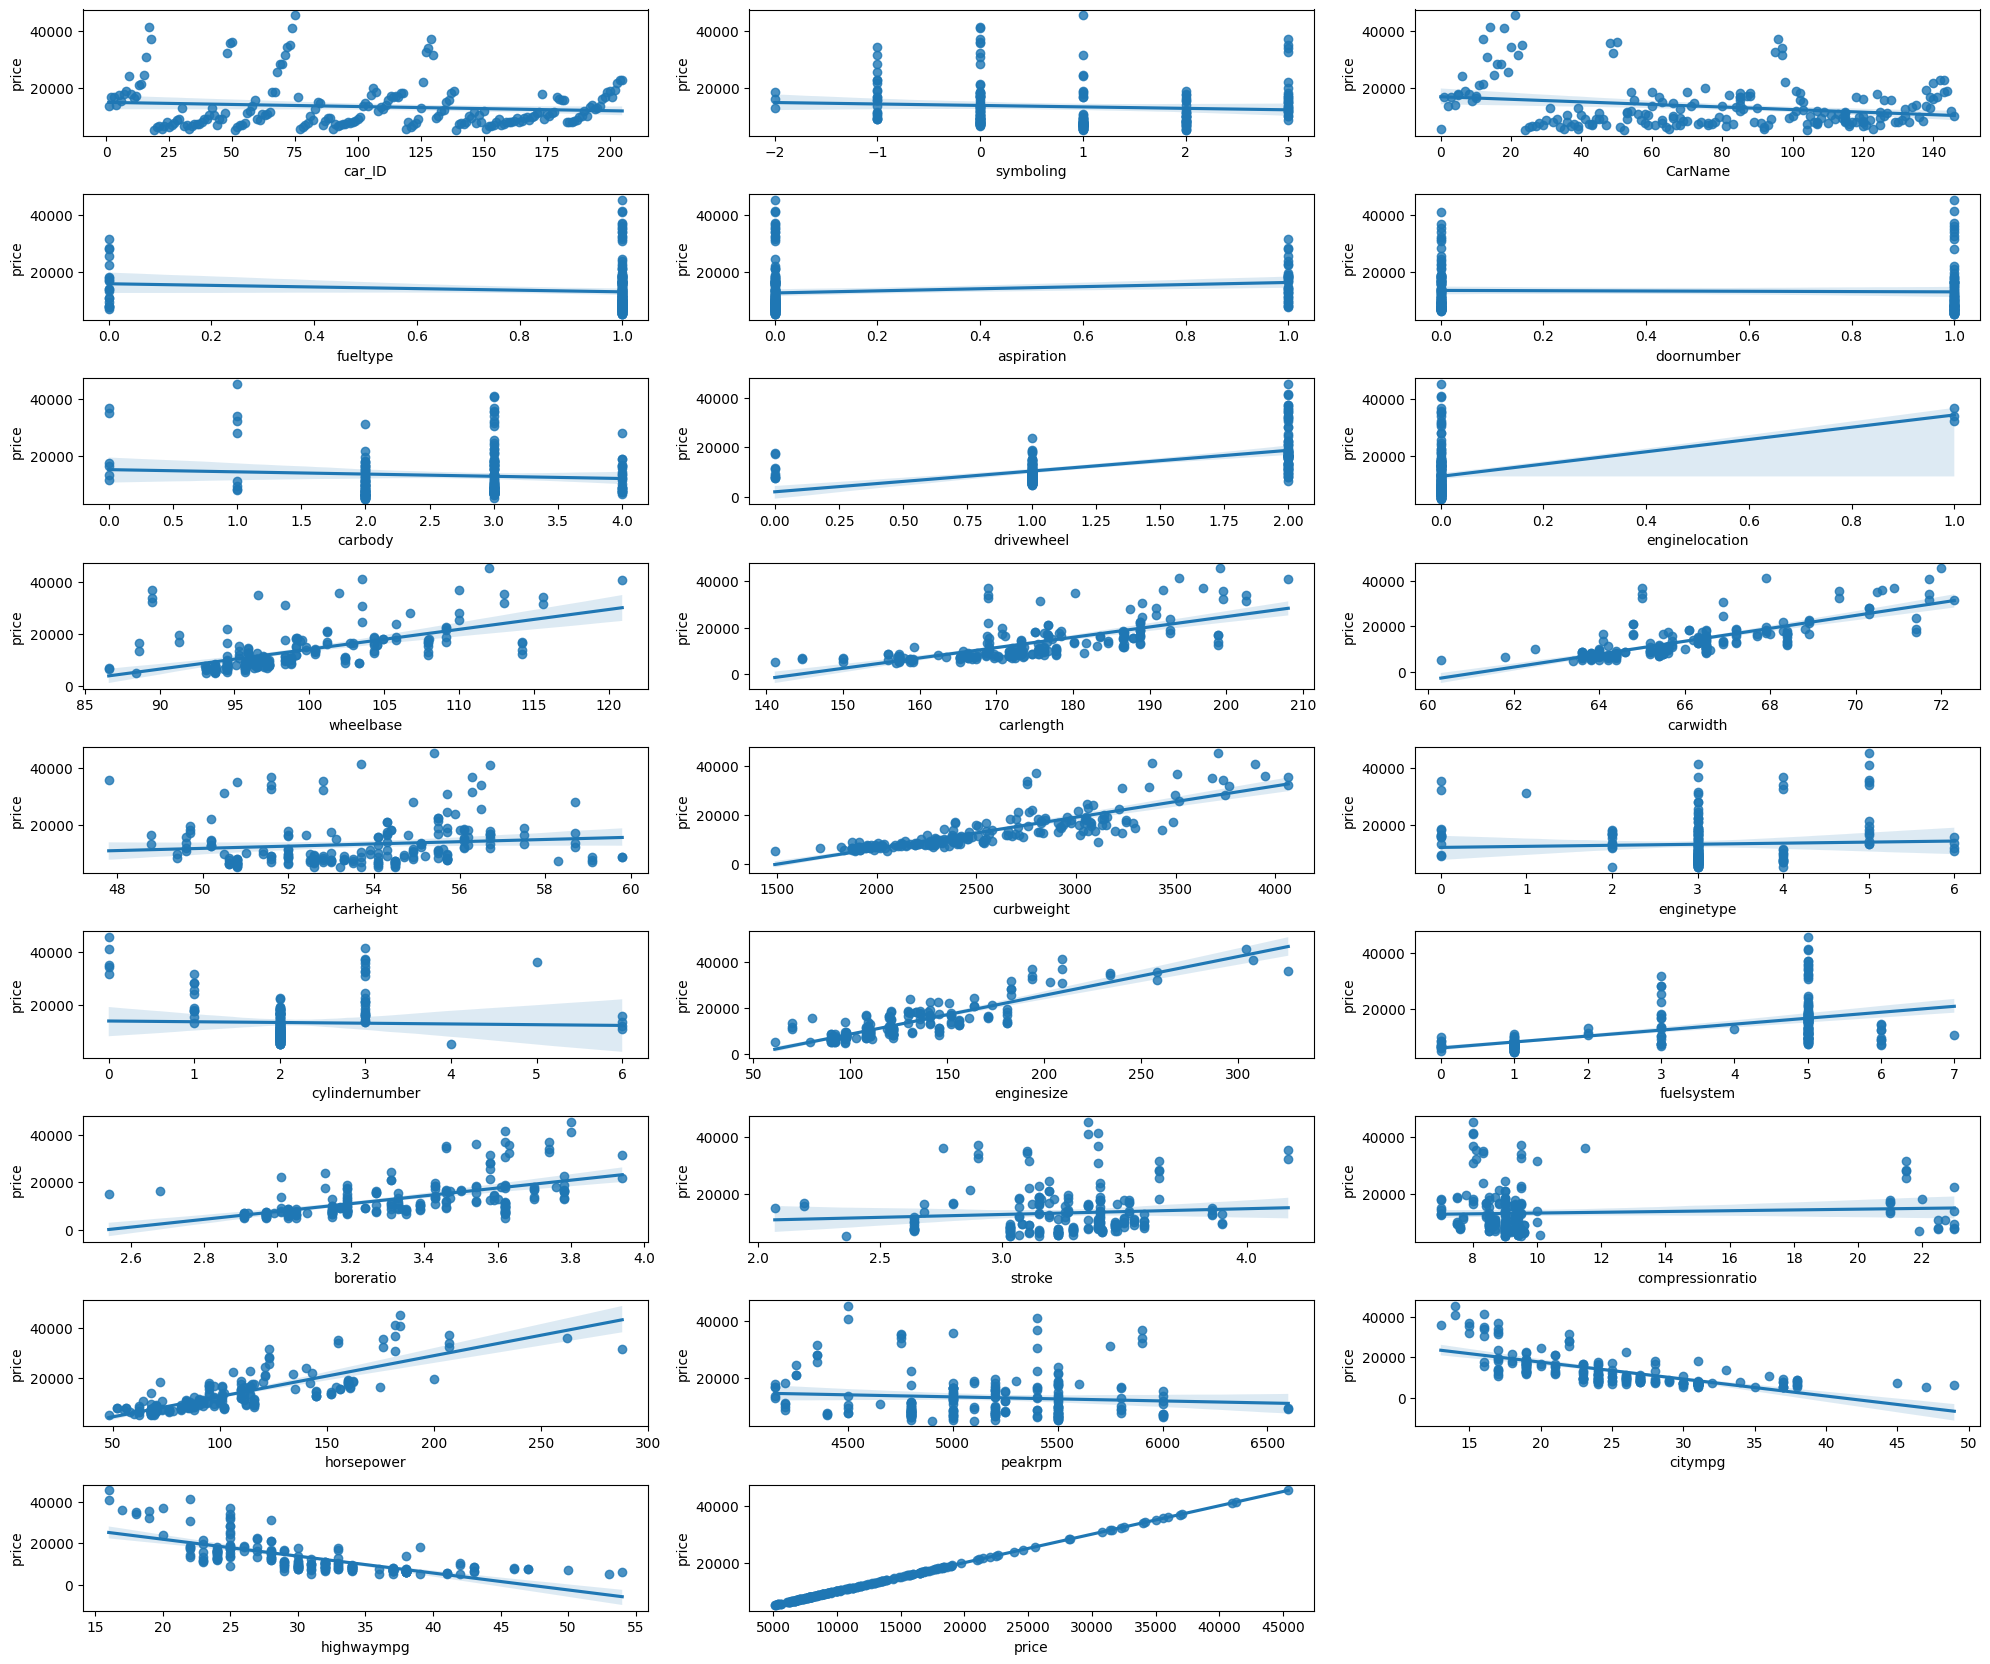

In [33]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(data):
    plt.subplot(11,3,i+1)
    sns.regplot(x=feature,y="price",data=data)
plt.tight_layout()
plt.show()

In [34]:
data=data.drop(["car_ID"],axis=1)
data=data.drop(["symboling"],axis=1)
data=data.drop(["CarName"],axis=1)
data=data.drop(["fueltype"],axis=1)
data=data.drop(["doornumber"],axis=1)
data=data.drop(["carbody"],axis=1)
data=data.drop(["carheight"],axis=1)
data=data.drop(["enginetype"],axis=1)
data=data.drop(["cylindernumber"],axis=1)
data=data.drop(["stroke"],axis=1)
data=data.drop(["compressionratio"],axis=1)
data=data.drop(["peakrpm"],axis=1)
data=data.drop(["aspiration"],axis=1)

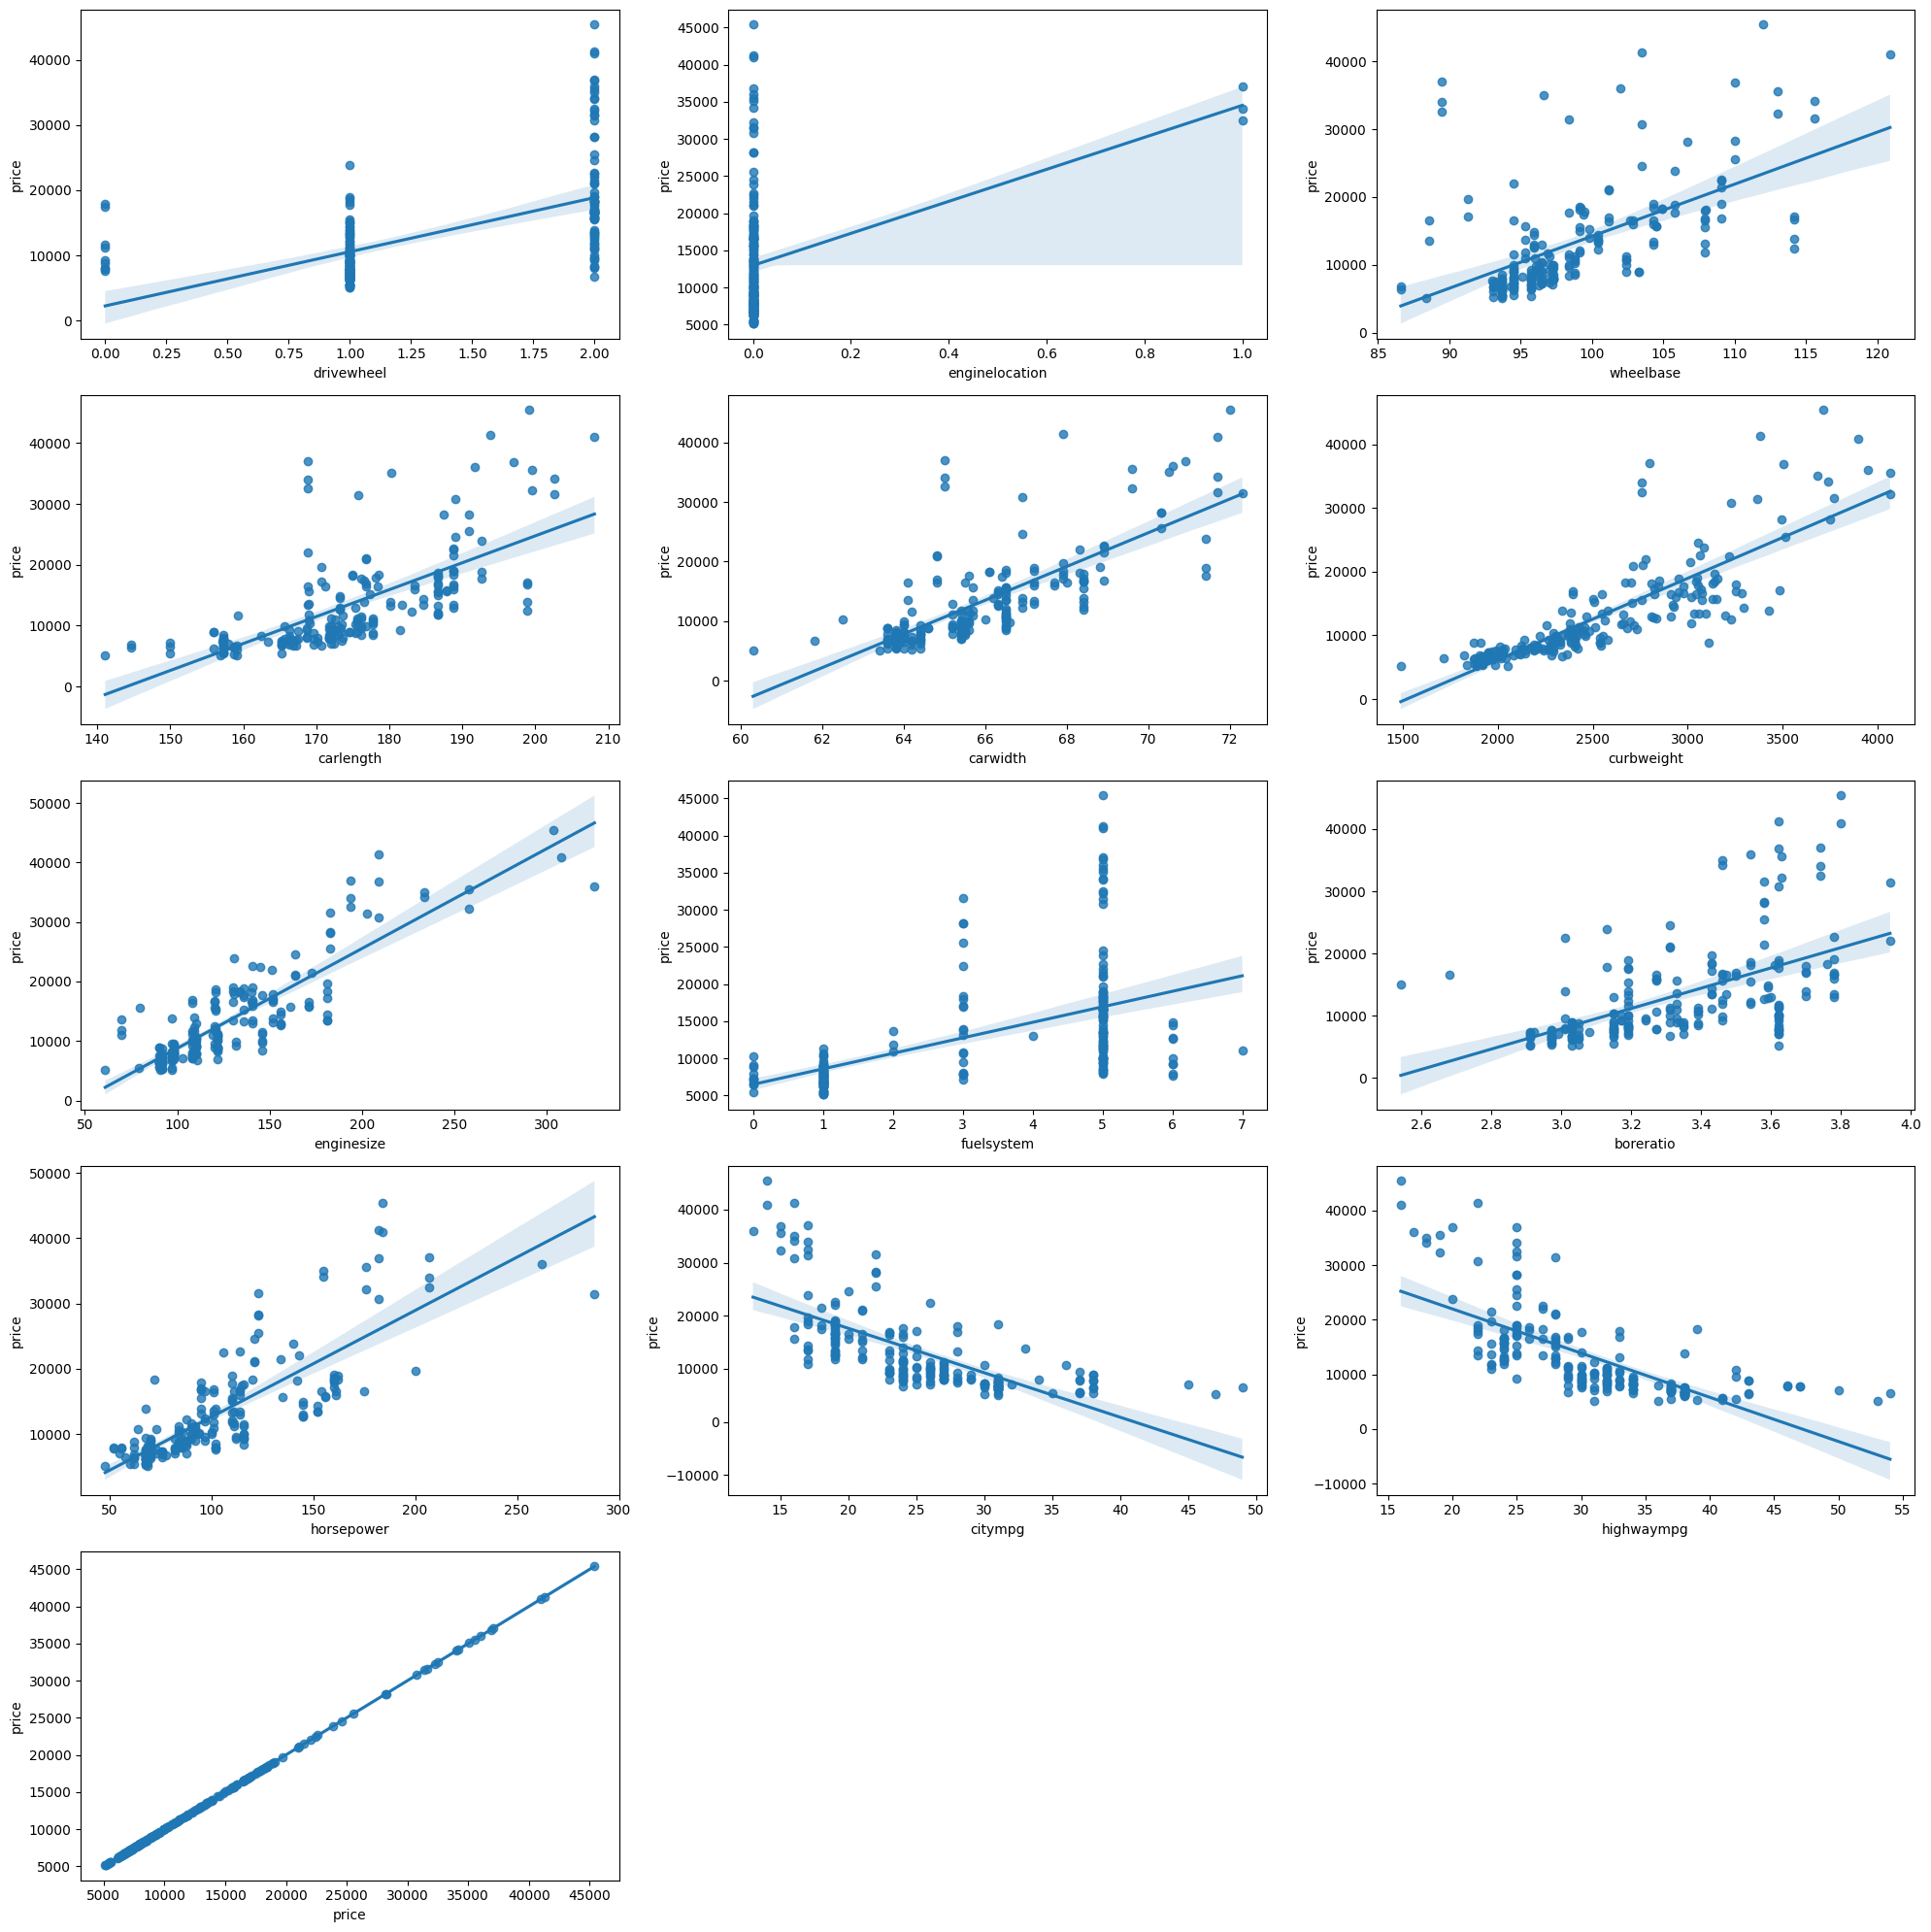

In [35]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(data):
    plt.subplot(5,3,i+1)
    sns.regplot(x=feature,y="price",data=data)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=data.drop(["price"],axis=1)
y=data["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x_train_std=ss.fit_transform(x_train)
x_test_std=ss.transform(x_test)
lr.fit(x_train_std,y_train)
y_pred=lr.predict(x_test_std)
y_pred

array([23318.18314285, 16996.32033709, 10310.24174406, 12248.08632158,
       25314.80313939,  6301.27668306,  6836.28645294,  7620.87332884,
        9301.09523879,  7569.55016789, 15365.88582802,  8320.04189292,
       15283.93222229, 12137.4324177 , 37289.85878997,  6224.70653745,
       -2208.63937921, 16136.33192467, 10972.77486388,  8994.55969617,
       11802.98351336, 19404.68705832,  6458.32390363,  4065.78055682,
        6455.48812523, 24484.29636084, 14101.73953236, 16106.14317642,
        6086.88410381, 15822.58019729, 24768.59576154,  6404.35381752,
        5646.81413738, 21904.66777933,  8338.47417365, 24676.92537409,
        8672.08608866, 10131.96123907,  5252.17681189, 16328.28851823,
        8696.80769591])

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8145451936798433

<Axes: >

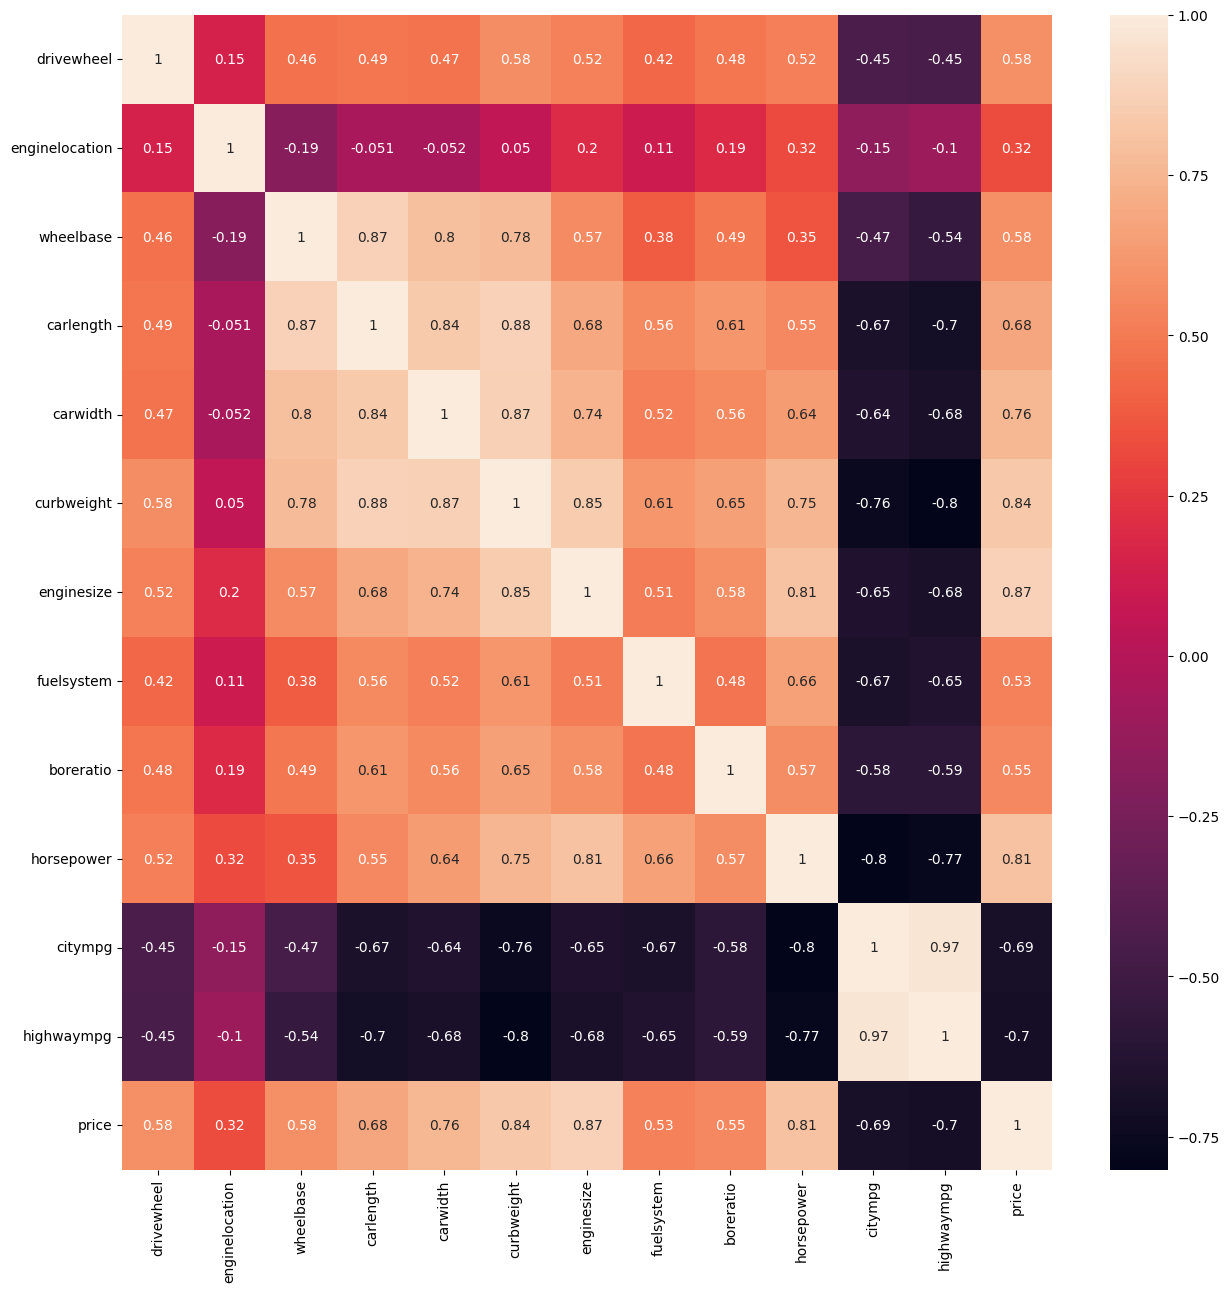

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)